In [1]:
#Install imageio package
# %pip install imageio

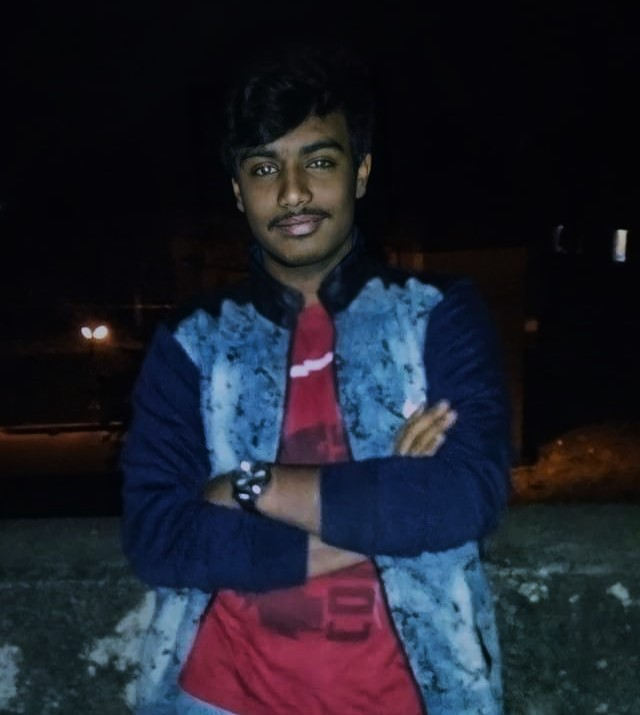

In [2]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp
import fileinput

#Display the image from the web using an URI.
# img = "https://blogger.googleusercontent.com/img/a/AVvXsEjw-bw_NBVbhkhDSL4IPmLJnk27eeU3-mk66p4IS9pB7eKirs3VLxUJcBUiRchtVLjaEvy9T8R1P2Z_QXqLvzGockmaZNcjCozBCa8IlRvF-Fcmxmv3w9wiKxMv8ciAgC6TUopPahgGg7RW8Jem3w35PZhthT-txN9JAA0l5FCCg_pzd344_wZPQa8VTg=s418"
# dp.Image(requests.get(img).content)

# Prompt the user to enter the file path of the image
file_path = input("Enter the file path of the image: ")

# Read the image file
with open(file_path, 'rb') as f:
    img = f.read()

# Display the image
dp.Image(img)

In [3]:
#Read the image using imgaeio package's imread method and URI from web using 
source_img = imageio.imread(img)

C:\Users\rocks\AppData\Local\Temp\ipykernel_11776\3177397979.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  source_img = imageio.imread(img)


In [4]:
# Make the image Black and White using the formula Y= 0.299*R + 0.587*G + 0.114*B i.e. applying greyscale
import numpy as np

def grayscaleimg(rgb): 
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)

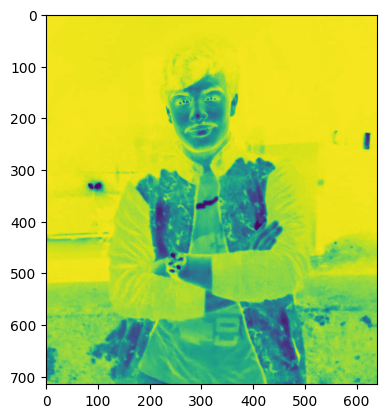

In [5]:
#Invert the image by subtracting it from 255
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

C:\Users\rocks\AppData\Local\Temp\ipykernel_11776\418652148.py:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)


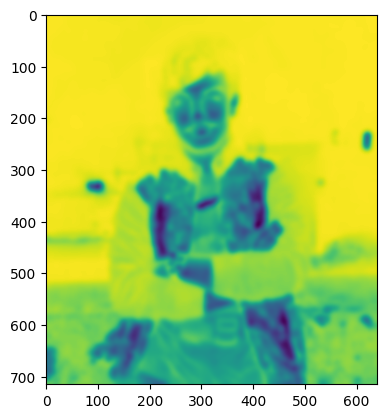

In [6]:
#Blur the image using gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [7]:
#Create function to perform dogding(belnding together greyscale and blurred image)
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [8]:
#Generate the target image by applying the dodge
target_img= dodging(blurred_img, gryscl_img)

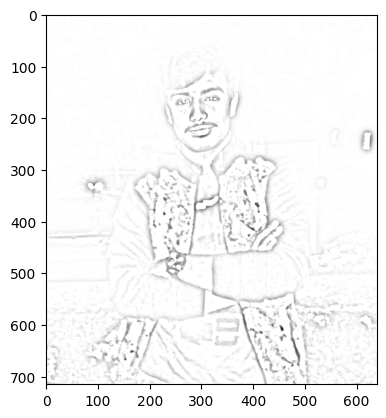

In [9]:
#Display the target image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")

In [10]:
#Save the image
plt.imsave('target_image.png', target_img, cmap='gray', vmin=0, vmax=255)